In [1]:
from astropy import constants as const
from plasmapy.physics import parameters
from astropy import units as u
from sympy import pi,oo
from sympy import integrate, symbols
import disper
import numpy as np
import matplotlib.pyplot as plt
import particle
from astropy import constants as const
from sympy import sin,cos,exp

species = ['e','p']

B = 1e-6 * u.T
n = [300e6* u.m ** -3, 300e6 * u.m ** -3]
theta_input = 0
theta_deg = theta_input *pi/180
gyro_frequency = parameters.gyrofrequency(B, 'e')
wave_frequency = 0.05 * gyro_frequency
print(wave_frequency)

8794.100118010621 rad / s


25.3797364184869
[0. 0. 0. 0. 0. 0. 0. 0.]
[18.5005092540089 15.5669968571798 13.9098899338025 12.8585831289900
 12.1568147168296 11.6846837222770 11.3797117185917 11.2081574091831]


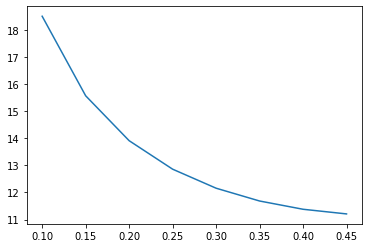

In [6]:
# test dispersion  solve
refraction_index = disper.solve_dispersion(B,species,n,wave_frequency,theta_input)
print(refraction_index)
# Draw a picture of n and w/Omega

x = np.arange(0.1,0.5,0.05)
refraction_index_array = np.zeros(len(x))
print(refraction_index_array)
refraction_index_array = []
for w in x:
    refraction_index = disper.solve_dispersion(B,species,n,w *gyro_frequency,theta_input)
    refraction_index_array = np.append(refraction_index_array,refraction_index)
print(refraction_index_array)

plt.plot(x,refraction_index_array)
plt.show()




nn 25.3797364184869
2.52183802252612e-218755360602
nn 18.5005092540089
nn 15.5669968571798
nn 13.9098899338025
nn 12.8585831289900
nn 12.1568147168296
nn 11.6846837222770
nn 11.3797117185917
nn 11.2081574091831
[-212695870600.580 -119093227099.337 -74321420434.1555 -48921265325.8672
 -33109710302.7835 -22703776711.0717 -15615698050.6883 -10687430733.5390]
nn 18.5005092540089
nn 15.5669968571798
nn 13.9098899338025
nn 12.8585831289900
nn 12.1568147168296
nn 11.6846837222770
nn 11.3797117185917
nn 11.2081574091831
[-212695870627303. -119093227125748. -74321420460304.5 -48921265351776.7
 -33109710328461.8 -22703776736518.1 -15615698075894.5 -10687430758489.3]


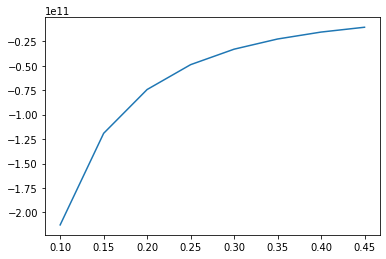

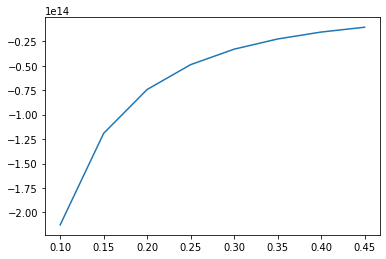

In [3]:
import cold_growth_rate
from sympy import log
B = 1e-6 * u.T
n = [300e6* u.m ** -3, 300e6 * u.m ** -3]
theta_input = 0
wave_over_Omega = 0.05
T_perp = 400000
T_para = 100000
vz = symbols('vz')
growth_rate_base,vz_res_base = cold_growth_rate.wave_growth_para('e',n,B,T_perp,T_para,wave_over_Omega)
growth_value_base = growth_rate_base.subs(vz,vz_res_base).evalf()
print(growth_value_base)

x = np.arange(0.1,0.5,0.05)

growth_rate_array_4 = []

for w in x:
    ccc, vz_res =  cold_growth_rate.wave_growth_para('e',n,B,T_perp,T_para,w)
    growth_rate = ccc.subs(vz,vz_res).evalf()
    growth_rate_array_4 = np.append(growth_rate_array_4,log(growth_rate))

print(growth_rate_array_4)

plt.plot(x,growth_rate_array_4)
plt.show()

growth_rate_array_2 = []

T_perp = 200
T_para = 100
for w in x:
    ccc, vz_res =  cold_growth_rate.wave_growth_para('e',n,B,T_perp,T_para,w)
    growth_rate = ccc.subs(vz,vz_res).evalf()
    growth_rate_array_2 = np.append(growth_rate_array_2,log(growth_rate))

print(growth_rate_array_2)

plt.plot(x,growth_rate_array_2)
plt.show()


    

In [8]:
vx = symbols('vx')
int_term =exp(-vx**2)
integrate(int_term,(vx,-oo,oo))

sqrt(pi)